# Ejercicio de Camino Crítico

Primero importamos las librerías de Networkx para trabajar con grafos y Matplotlib para trabajar con la impresión en pantalla de figuras

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

Luego creamos una variable G1 en formato nx.DiGraph() vacía. En esta variable guardaremos el grafo que queremos crear.

In [9]:
G1=nx.DiGraph()

Ahora creamos una lista de los nodos que tendrá el grafo G1 con la función "add_node('nombre_del_nodo')"

In [10]:
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)
G1.add_node(4)
G1.add_node(5)
G1.add_node(6)

Para visualizar los nodos del grafo G1 simplemente imprimimos en pantalla G1.nodes()

In [11]:
G1.nodes()

[1, 2, 3, 4, 5, 6]

Ahora procedemos a crear los arcos ('edges' en inglés) del grafo G1 con la función "add_edge('nodo_origen, nodo_destino', weight = duración_del_arco/tarea)"

In [12]:
G1.add_edge(1, 2, weight = 2.0)
G1.add_edge(1, 3, weight = 4.0)
G1.add_edge(2, 3, weight = 1.0)
G1.add_edge(2, 4, weight = 4.0)
G1.add_edge(2, 5, weight = 2.0)
G1.add_edge(3, 5, weight = 3.0)
G1.add_edge(4, 6, weight = 2.0)
G1.add_edge(5, 4, weight = 3.0)
G1.add_edge(5, 6, weight = 2.0)

Para visualizar la lista de arcos nodo-a-nodo se procede a imprimir por pantalla con .edges()

In [13]:
G1.edges()

[(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 6), (5, 4), (5, 6)]

Ahora que el grafo G1 esta construido procedemos a aplicar el algoritmo Dijkstra para encontrar la ruta mas corta en un grafo (es decir el camino crítico). Se indica en la primera posición el grafo a procesar, G1. En la segunda posición el nodo inicial. En la tercera posición el nodo de finalización.

In [15]:
camino_critico = nx.dijkstra_path(G1,source = 1, target = 6)

Una vez identificado el camino crítico procedemos a obtener la duración del camino crítico, que será la duración del proyecto.

In [17]:
duracion_proyecto = nx.dijkstra_path_length(G1,source = 1, target = 6)

Ahora imprimimos por pantalla la duración del proyecto y el camino crítico.

In [19]:
print("El camino crítico del proyecto contiene las tareas " + str(camino_critico))

El camino crítico del proyecto contiene las tareas [1, 2, 5, 6]


In [21]:
print("El camino crítico del proyecto tiene una duración de " + str(duracion_proyecto) + " dias")

El camino crítico del proyecto tiene una duración de 6.0 dias


Ahora procedemos a imprimir por pantalla el grafo para visualizarlo.

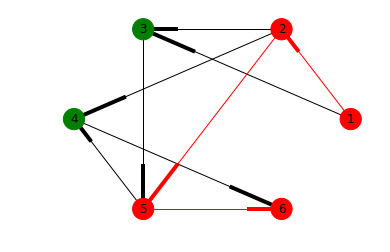

In [23]:
# Los pesos de cada arco se almacenan en un diccionario arc_weight
arc_weight=nx.get_edge_attributes(G1,'weight')
# Se crea una lista de los arcos del camino critico y se los guarda como red_edges
red_edges = list(zip(camino_critico,camino_critico[1:]))
# Si un nodo esta en el camino crítico se lo pinta de rojo, si no esta en el CC se lo pinta de verde
node_col = ['green' if not node in camino_critico else 'red' for node in G1.nodes()]
#  Si un arco se encuentra en el camino critico se lo pinta de rojo. Caso contrario se pinta de negro.
edge_col = ['black' if not edge in red_edges else 'red' for edge in G1.edges()]
# Con la función draw_network graficamos el grafo.
nx.draw_networkx(G1, nx.shell_layout(G1),node_color= node_col,edge_color= edge_col, edge_labels = arc_weight, node_size=450)
# Removemos los ejes de la visualización para que quede mas limpio
plt.axis('off')
plt.show()